# Improting Necessary Libraries

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('../Dataset/StudentsPerformance.csv')

# Data Understanding

In [24]:
def data_understanding(df):
        print(f"{'*' * 50} Data Information {'*' * 68}")
        display(df.info())
        print(f"\n{'*' * 50} Checking For Duplicate Values {'*' * 55}")
        display(df.duplicated().sum())
        print(f"\n{'*' * 50} Description of Numerical Columns {'*' * 52}")
        display(df.describe())
        print(f"\n{'*' * 50} Description of Categorical Columns {'*' * 50}")
        display(df.describe(include = 'object'))
        print(f"\n{'*' * 50} DataFrame Summary {'*' * 50}")
        display(df.head())
    
data_understanding(df)

************************************************** Data Information ********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None


************************************************** Checking For Duplicate Values *******************************************************


np.int64(0)


************************************************** Description of Numerical Columns ****************************************************


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



************************************************** Description of Categorical Columns **************************************************


,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642



************************************************** DataFrame Summary **************************************************


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data Cleaning 

In [25]:
# Function to clean the data
def cleaned_data(df):
    # Rename Columns 
    df = df.rename(columns = {'race/ethnicity':'group', 'parental level of education': 'parental_education',
                        'test preparation course':'test_preparation_course', 'math score':'math_score',
                        'reading score': 'reading_score','writing score' : 'writing_score'})
    
    # Create a new column for Average Score for All Subject
    df['avg_score'] = round((df['math_score'] + df['reading_score'] + df['writing_score']) / 3,2)
    
    # Created a Grade category using avg_score for each student
    def grades(df):
        if df['avg_score'] > 85:
            return 'A+'
        elif df['avg_score'] > 75:
            return 'A'
        elif df['avg_score'] > 65:
            return 'B'
        elif df['avg_score'] > 55:
            return 'C'
        else:
            return 'D'
    df['grades'] = df.apply(grades,axis = 1)
    df = df
    return df

df = cleaned_data(df)


# Exploratory Data Analysis (EDA)

In [26]:
# Function to Visualise the Data
def visualisation(df):
    # Use Seaborn pastel theme globally
    sns.set_theme(style="whitegrid", palette="pastel")
    pastel_colors = ['#C5DCA0', '#F7B7A3', '#BFD7EA', '#E2C2B9', '#F3D1DC']

    # 1. Distribution of Grades
    df['grades'].value_counts().plot(
        kind='pie',
        autopct='%.2f%%',
        colors=pastel_colors
    )
    plt.title('Distribution of Grades')
    plt.ylabel('')
    plt.savefig('../Images/distribution_of_grades.png')
    plt.show()

    # 2. Distribution of Students by Gender
    plt.pie(
        df['gender'].value_counts(),
        labels=['Female', 'Male'],
        autopct='%.2f%%',
        colors=['#F7B7A3', '#BFD7EA']
    )
    plt.title('Distribution of Students by Gender')
    plt.savefig('../Images/distribution_by_gender.png')
    plt.show()

    # 3. Subplots for Gender and Group Count
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    ax = sns.countplot(x='gender', data=df, color='#C5DCA0')
    ax.bar_label(ax.containers[0])
    plt.title('Count of Students by Gender')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    ax = sns.countplot(x='group', data=df, color='#BFD7EA')
    ax.bar_label(ax.containers[0])
    plt.title('Count of Students by Group')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.savefig('../Images/count_gender_group.png')
    plt.show()

    # 4. Average Score by Subject
    math_avg = round(df['math_score'].mean(), 2)
    reading_avg = round(df['reading_score'].mean(), 2)
    writing_avg = round(df['writing_score'].mean(), 2)
    graph_df = pd.DataFrame({
        'Subject': ['Math', 'Reading', 'Writing'],
        'Score': [math_avg, reading_avg, writing_avg]
    })
    ax = sns.barplot(x='Subject', y='Score', data=graph_df, palette=['#F7B7A3', '#C5DCA0', '#BFD7EA'])
    ax.bar_label(ax.containers[0])
    plt.title('Average Score by Subject')
    plt.savefig('../Images/average_score_by_subject.png')
    plt.show()

    # 5. Score by Gender & Subject
    by_gender = df.groupby('gender').agg({
        'math_score': 'mean',
        'writing_score': 'mean',
        'reading_score': 'mean'
    }).apply(lambda x: round(x, 2))

    ax = by_gender.plot(
        kind='bar',
        figsize=(10, 6),
        ylabel='Avg_Score',
        color=['#F7B7A3', '#BFD7EA', '#C5DCA0']
    )
    plt.title('Average Score Across All Subject By Gender')
    for container in ax.containers:
        ax.bar_label(container)
    plt.savefig('../Images/average_score_by_gender.png')
    plt.show()

    # 6. Group and Parental Education Score
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    ax = sns.barplot(x='group', y='avg_score', data=df, ci=None, color='#C5DCA0')
    ax.bar_label(ax.containers[0])
    plt.title('Students Avg Score across Groups')

    # Parental Education
    plt.subplot(1, 2, 2)
    ax = sns.barplot(x='parental_education', y='avg_score', data=df, ci=None, color='#BFD7EA')
    ax.bar_label(ax.containers[0])
    plt.title('Students Avg Score by Parental Education')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../Images/score_by_group_and_parental_education.png')
    plt.show()

    # 7. Lunch and Test Preparation
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    ax = sns.barplot(x=df['lunch'], y=df['avg_score'], ci=None, color='#F7B7A3')
    ax.bar_label(ax.containers[0])
    plt.xlabel('Lunch Type')
    plt.ylabel('Avg_Score')
    plt.title('Student Performance by Lunch Type')

    # Test Preparation Course
    plt.subplot(1, 2, 2)
    ax = sns.barplot(x=df['test_preparation_course'], y=df['avg_score'], ci=None, color='#E2C2B9')
    ax.bar_label(ax.containers[0])
    plt.xlabel('Test Preparation')
    plt.ylabel('Avg_Score')
    plt.title('Student Performance by Test Prep Course')
    plt.tight_layout()
    plt.savefig('../Images/performance_by_lunch_and_test_prep.png')
    plt.show()

    # 8. Test Prep by Gender and Group
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    new = df.groupby(['gender', 'test_preparation_course'])['avg_score'].mean().apply(lambda x: round(x, 2)).reset_index()
    ax1 = sns.barplot(x='gender', y='avg_score', data=new, hue='test_preparation_course', palette=['#C5DCA0', '#BFD7EA'])
    plt.title('Student Performance by Test Prep Course and Gender')
    for container in ax1.containers:
        ax1.bar_label(container)

    # Test Preparation Course Group Wise
    plt.subplot(1, 2, 2)
    new2 = df.groupby(['group', 'test_preparation_course'])['avg_score'].mean().apply(lambda x: round(x, 2)).reset_index()
    ax2 = sns.barplot(x='group', y='avg_score', data=new2, hue='test_preparation_course', palette=['#C5DCA0', '#BFD7EA'])
    plt.title('Student Performance by Test Prep Course and Group')
    for container in ax2.containers:
        ax2.bar_label(container)
    plt.tight_layout()
    plt.savefig('../Images/test_prep_by_gender_and_group.png')
    plt.show()

    # 9. Correlation Heatmap
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
    plt.title('Correlation Heatmap Between Scores')
    plt.savefig('../Images/correlation_heatmap.png')
    plt.show()

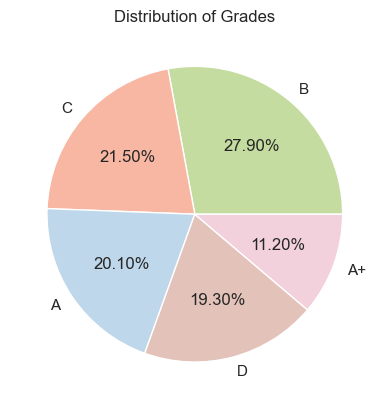

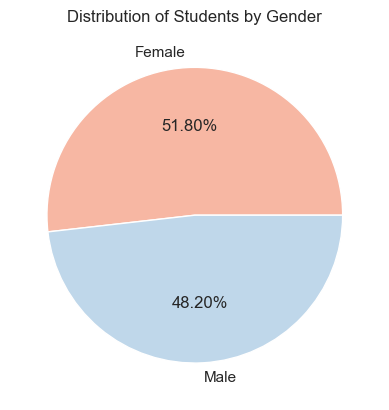

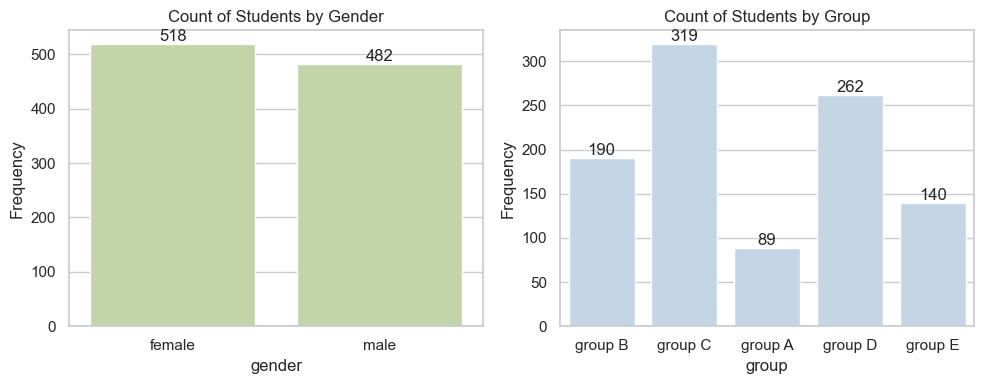

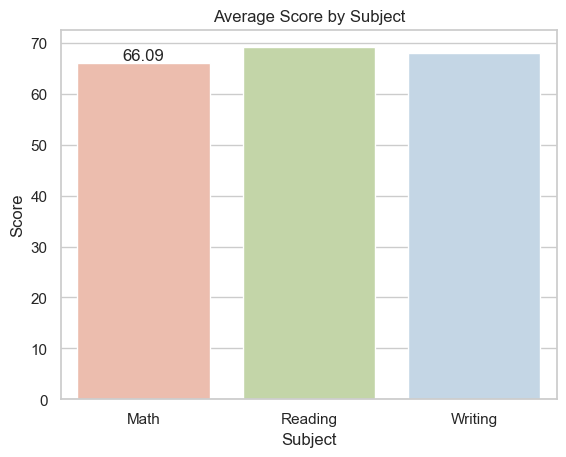

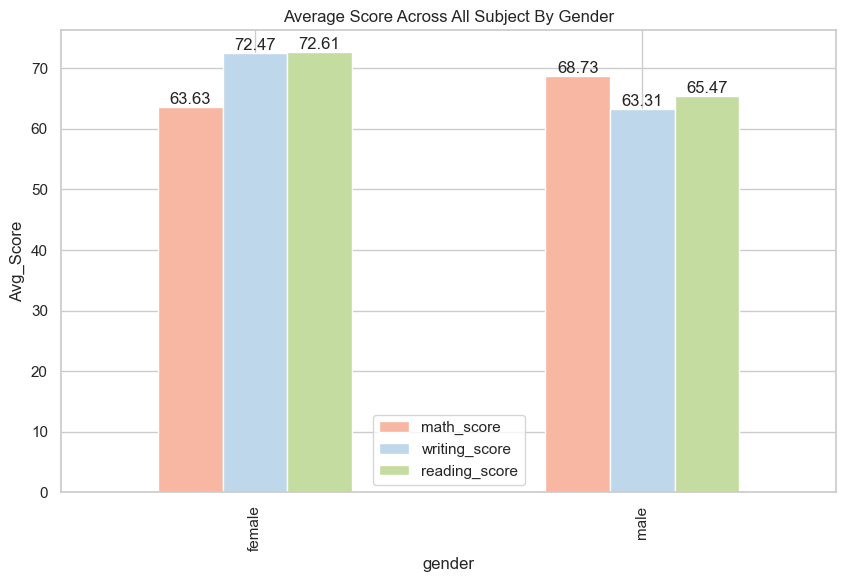

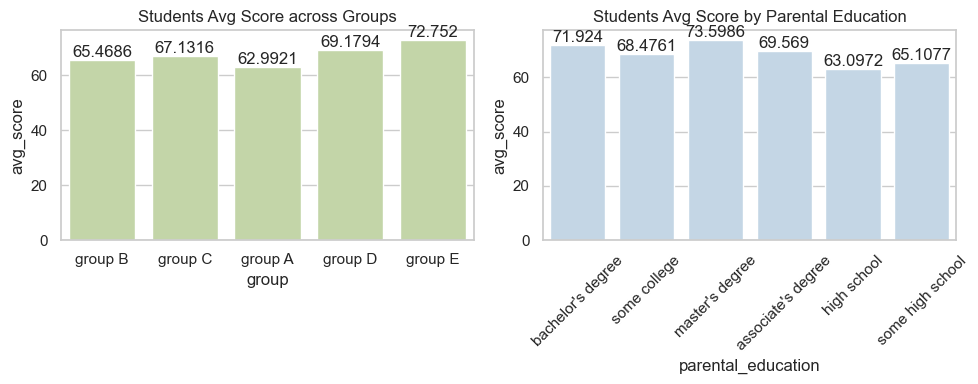

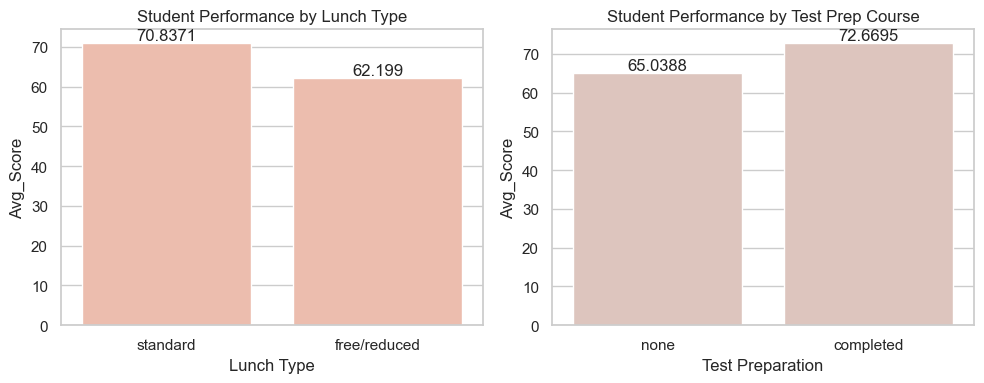

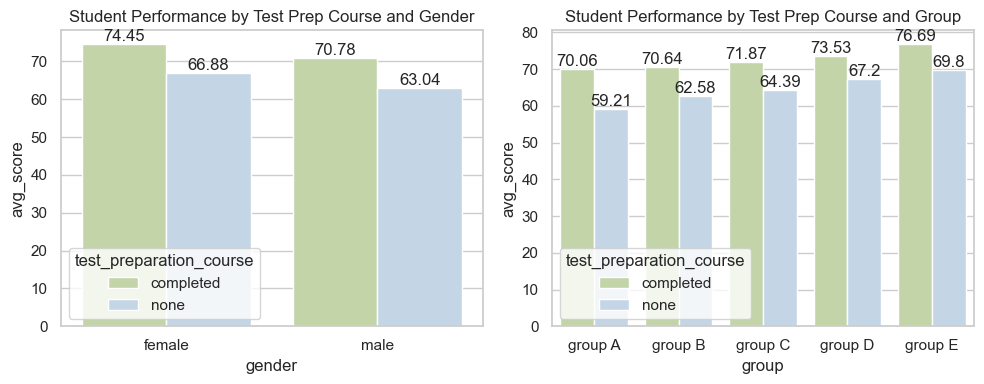

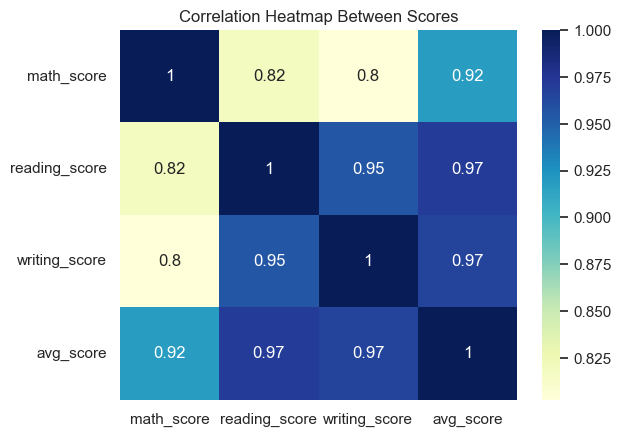

In [27]:
visualisation(df)

# Insights and Suggestions 

In [28]:
def insights_suggestions():
        print ( f"{'*' * 50} Insights {'*' * 50}"
               
            ''' 
        1. Gender Differences
            - Female students generally score higher in reading and writing.
            - Male students tend to do slightly better in math.
           
        3. Impact of Test Preparation
            - Students who completed the test preparation course performed better across all subjects.
            - The average score and grade were noticeably higher for these students.
        
        4. Parental Education Influence
            - Higher parental education levels correlate with better student performance.
            - Students whose parents have a bachelor’s or master’s degree tend to score higher.
        
        5. Ethnic Group Performance
            - Group E students had the highest average scores, followed by Group D.
            - Group A students showed the lowest average performance.
        
        6. Grade Distribution
            - Most students fall into grade categories B and C.
            - Very few students achieved an A+ grade.
        
        7. Overall Trends
            - A student’s performance is influenced by multiple factors including gender, parental education, and test preparation.
            - Reading and writing scores are closely aligned, while math shows more variance.
        ''')
        
        print ( f"{'*' * 50} Suggestions {'*' * 50}"
               
            '''
        1. Test Prep Works
            - Students in test prep programs score higher.
            - Expand access or make it mandatory.
        
        2. Gender-Based Gaps
            - Girls excel in reading/writing; boys slightly lead in math.
            - Offer subject-specific support by gender.
        
        3. Parental Education Impact
            - Higher parental education = better student scores.
            - Provide extra help to students with less-educated parents.
        
        4. Group Performance Gaps
            - Some ethnic groups consistently underperform.
            - Launch group-specific academic support.
        
        5. Grades Cluster at Mid-Level
            - Most students are in B/C range.
            - Refine curriculum to lift more students to A levels.
        
        ''' )

In [29]:
insights_suggestions()

************************************************** Insights ************************************************** 
        1. Gender Differences
            - Female students generally score higher in reading and writing.
            - Male students tend to do slightly better in math.

        3. Impact of Test Preparation
            - Students who completed the test preparation course performed better across all subjects.
            - The average score and grade were noticeably higher for these students.

        4. Parental Education Influence
            - Higher parental education levels correlate with better student performance.
            - Students whose parents have a bachelor’s or master’s degree tend to score higher.

        5. Ethnic Group Performance
            - Group E students had the highest average scores, followed by Group D.
            - Group A students showed the lowest average performance.

        6. Grade Distribution
            - Most students fall into gra

In [30]:
df.to_csv('../Dataset/Cleaned Student File.csv')